<FONT size="5.9pt"> **NB2 - PROSPECTIVE CONSEQUENTIAL LCA OF BARK BIOREFINING - PART 2**
</FONT> 

This Part 2 focuses on calculating the time-dependent (or dynmaic) climate impacts of the bark biorefinery and combustion scenarios using the dynamic characterisation factors (DCFs) developped by [Levasseur et al. (2010)](https://pubs.acs.org/doi/10.1021/es9030003). 

In [1]:
import os
from shutil import copyfile
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wdir = '/home/leabraud/Documents/LCAbark' ### DIRECTORY TO BE CHANGED
pdir = os.path.join(wdir,'projects')
print('Working directory:', wdir)

# set the directory to store the results
result_dir = os.path.join(wdir,'results')   
pathlib.Path(result_dir).mkdir(parents=True, exist_ok=True)
print('Results directory:', result_dir)

Working directory: /home/leabraud/Documents/LCAbark
Results directory: /home/leabraud/Documents/LCAbark/results


# Dynamic characterisation factors (from Levasseur et al. 2010)

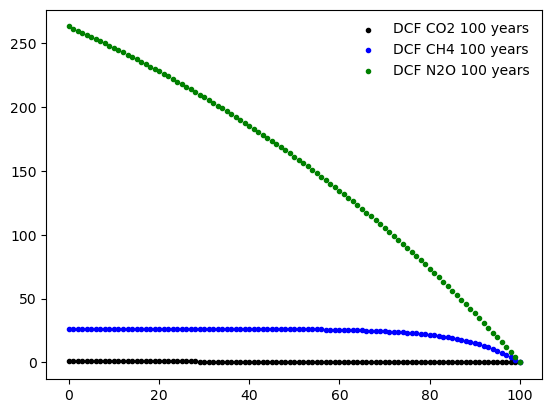

In [3]:
from scipy.interpolate import UnivariateSpline

# dynamic characterisation factors for 100 years time horizon developed by Levasseur et al. (2010)
DCF100 = pd.read_excel(str(wdir + '/dynamic_characterisation_factors_Levasseur100.xlsx'))

x = DCF100.index
yCO2 = DCF100['CO2_CF']
yCH4 = DCF100['CH4_CF']
yN2O = DCF100['N2O_CF']
fCO2 = UnivariateSpline(x, yCO2, s=1)
fCH4 = UnivariateSpline(x, yCH4, s=1)
fN2O = UnivariateSpline(x, yN2O, s=1)

plt.scatter(x, yCO2, marker = '.',label = 'DCF CO2 100 years',color = 'black',zorder=1)
plt.scatter(x, yCH4, marker = '.',label = 'DCF CH4 100 years',color = 'blue',zorder=1)
plt.scatter(x, yN2O, marker = '.',label = 'DCF N2O 100 years',color = 'green',zorder=1)
#plt.plot(x, fCO2(x), '--',lw = 1, label = 'Spline Fit',color = 'red',zorder=2)

plt.legend(frameon=False)
plt.show()

# Time-dependent climate impacts from indirect CO2, CH4, and N2O emissions 

**Import the indirect emissions inventory (CO2, CH4, and N2O)**

The time-dependent climate impacts are calculated using the DCFs developed by Levasseur et al. (2010) and shown above. The inventory data for the three scenarios were obtained from the Activity Browser in order to have the list of indirect CO2, CH4, and N2O emissions. The indirect emissions were aggregated per main product/process (see Supplementary Materials). 

In [4]:
sheet_names = ['ei39CO2','ei39CH4','ei39N2O', # ecoinvent consequential 3.9
               'R2PkCO2','R2PkCH4','R2PkN2O', # # ecoinvent consequential 3.9 REMIND SSP2 PkBudg500 2045
               'R2BCO2','R2BCH4','R2BN2O', # # ecoinvent consequential 3.9 REMIND SSP2 Base 2045
               'R1PkCO2','R1PkCH4','R1PkN2O', # # ecoinvent consequential 3.9 REMIND SSP1 PkBudg500 2045
               'I2BCO2','I2BCH4','I2BN2O', # # ecoinvent consequential 3.9 IMAGE SSP2 Base 2045
                ]

In [5]:
inventory_dict = {}

for name in sheet_names: 
    df = pd.read_excel(str(wdir + '/indirect_GHG_emissions.xlsx'), sheet_name=name, index_col=0)
    inventory_dict[name] = df

inventory_dict.keys()

dict_keys(['ei39CO2', 'ei39CH4', 'ei39N2O', 'R2PkCO2', 'R2PkCH4', 'R2PkN2O', 'R2BCO2', 'R2BCH4', 'R2BN2O', 'R1PkCO2', 'R1PkCH4', 'R1PkN2O', 'I2BCO2', 'I2BCH4', 'I2BN2O'])

In [6]:
inventory_dict['R2PkCH4']

,Stand-alone biorefinery,Integrated biorefinery,Combustion,Year
lipophilic extraction,0.000258,4.603448e-05,0.000000,35
sugar extraction,0.000435,1.700689e-07,0.000000,35
pulping,0.001776,9.300536e-05,0.000000,35
heat (RB),-0.000003,-2.534688e-06,0.000000,35
heat (burd.),-0.000012,-1.154691e-05,0.000000,35
tall oil (sub.),-0.000034,-3.435296e-05,0.000000,35
starch (sub.),-0.001462,-1.461911e-03,0.000000,35
phenol (sub.),-0.002320,-2.320197e-03,0.000000,35
pulp (sub.),-0.000022,-2.192176e-05,0.000000,35
heat CHP bark,0.000000,0.000000e+00,-0.000014,35


**Calculate the time-dependent climate impacts for indirect CO2, CH4, and N2O emissions**

The time-dependent climate impacts are calculated for CO2, CH4, and N2O separately based on the inventory data imported (see above). The indirect emissions are multiplied by the DCFs corresponding to the specific year and GHG. The values obtained correspond to the spreadsheets "DCFtotal_ei39" and "DCFtotal_ei39R2".

In [7]:
# copy the dictionary to store the temporary time-dependent / dynamic climate impacts
DCI_dict = {} 

for df_name in inventory_dict.keys(): 

    # important to create a copy, else updates the content of inventory_dict as well
    df = inventory_dict[df_name].copy()

    if 'CO2' in df_name: 
        df['CF_CO2'] = df.apply(lambda row: fCO2(row['Year']), axis=1)
        df['Stand-alone biorefinery'] = df['Stand-alone biorefinery']*df['CF_CO2']
        df['Integrated biorefinery'] = df['Integrated biorefinery']*df['CF_CO2']
        df['Combustion'] = df['Combustion']*df['CF_CO2']
        #df = df.drop(['Year', 'CF_CO2'], axis=1)
        df = df.drop(['CF_CO2'], axis=1)
        #df.loc['Total']= df.sum()

    if 'CH4' in df_name: 
        df['CF_CH4'] = df.apply(lambda row: fCH4(row['Year']), axis=1)
        df['Stand-alone biorefinery'] = df['Stand-alone biorefinery']*df['CF_CH4']
        df['Integrated biorefinery'] = df['Integrated biorefinery']*df['CF_CH4']
        df['Combustion'] = df['Combustion']*df['CF_CH4']
        #df = df.drop(['Year', 'CF_CH4'], axis=1)
        df = df.drop(['CF_CH4'], axis=1)
        #df.loc['Total']= df.sum()

    if 'N2O' in df_name:
        df['CF_N2O'] = df.apply(lambda row: fN2O(row['Year']), axis=1)
        df['Stand-alone biorefinery'] = df['Stand-alone biorefinery']*df['CF_N2O']
        df['Integrated biorefinery'] = df['Integrated biorefinery']*df['CF_N2O']
        df['Combustion'] = df['Combustion']*df['CF_N2O']
        #df = df.drop(['Year', 'CF_N2O'], axis=1)
        df = df.drop(['CF_N2O'], axis=1)
        #df.loc['Total']= df.sum()

    DCI_dict[df_name] = df

DCI_dict.keys()

dict_keys(['ei39CO2', 'ei39CH4', 'ei39N2O', 'R2PkCO2', 'R2PkCH4', 'R2PkN2O', 'R2BCO2', 'R2BCH4', 'R2BN2O', 'R1PkCO2', 'R1PkCH4', 'R1PkN2O', 'I2BCO2', 'I2BCH4', 'I2BN2O'])

In [8]:
DCI_dict['R2PkCH4']

,Stand-alone biorefinery,Integrated biorefinery,Combustion,Year
lipophilic extraction,0.006806,0.001213,0.0,35
sugar extraction,0.011465,0.000004,0.0,35
pulping,0.046799,0.002451,0.0,35
heat (RB),-0.000067,-0.000067,0.0,35
heat (burd.),-0.000304,-0.000304,0.0,35
tall oil (sub.),-0.000905,-0.000905,0.0,35
starch (sub.),-0.038532,-0.038532,0.0,35
phenol (sub.),-0.061155,-0.061155,0.0,35
pulp (sub.),-0.000578,-0.000578,0.0,35
heat CHP bark,0.0,0.0,-0.000371,35


**Calculate the total time-dependent climate impacts for indirect CO2, CH4, and N2O emissions**

The values obtained for each GHG assessed (CO2, CH4, and N2O) are summed. 

In [9]:
sum_indirect_DCI = {}
scenario_GHGs = {"ei39": ["ei39CO2", "ei39CH4", "ei39N2O"],"R2Pk": ["R2PkCO2", "R2PkCH4", "R2PkN2O"],"R2B": ["R2BCO2", "R2BCH4", "R2BN2O"],"R1Pk": ["R1PkCO2", "R1PkCH4", "R1PkN2O"],"I2B": ["I2BCO2", "I2BCH4", "I2BN2O"]}
year_col = DCI_dict['ei39CO2']['Year'] # years are the same for all BGs
for scenario, GHGs in scenario_GHGs.items():
    sum_indirect_DCI[scenario] = sum(DCI_dict[GHG] for GHG in GHGs)
    sum_indirect_DCI[scenario]["Year"] = year_col
sum_indirect_DCI.keys()

dict_keys(['ei39', 'R2Pk', 'R2B', 'R1Pk', 'I2B'])

In [10]:
sum_indirect_DCI['R2Pk']

,Stand-alone biorefinery,Integrated biorefinery,Combustion,Year
lipophilic extraction,0.049179,0.006802,0.0,35
sugar extraction,0.086848,0.000009,0.0,35
pulping,0.148807,0.022448,0.0,35
heat (RB),0.00026,0.00026,0.0,35
heat (burd.),0.001186,0.001186,0.0,35
tall oil (sub.),-0.029054,-0.029054,0.0,35
starch (sub.),-0.240866,-0.240866,0.0,35
phenol (sub.),-0.297376,-0.297376,0.0,35
pulp (sub.),0.050715,0.050715,0.0,35
heat CHP bark,0.0,0.0,0.001447,35


# Time-dependent climate impacts from direct CO2 emissions 

The calculation of the direct CO2-eq emissions is based on the carbon balance of the biorefinery (see Supplementary Material 1 and 3). Carbon capture is excluded here since the LCA study is limited to gate-to-gate system boundaries (see manuscript). 

In [11]:
carbon_content_df = pd.read_excel(str(wdir + '/carbon_content.xlsx'), index_col=0)
carbon_content_df

,Stand-alone biorefinery,Integrated biorefinery,Combustion,Year
Product,,,,
residual biomass,62.18,62.18,NaN,35
EoL pulp biomed,58.44,58.44,NaN,36
EoL pulp textiles,58.44,58.44,NaN,40
EoL pulp nanocomposites,58.44,58.44,NaN,55
EoL phenol automotive,60.10,60.10,NaN,48
EoL phenol construction,34.56,34.56,NaN,85
EoL phenol furniture,27.05,27.05,NaN,50
EoL phenol electronics,21.04,21.04,NaN,42
EoL phenol others,7.51,7.51,NaN,56


In [12]:
direct_CO2_emissions_df = carbon_content_df.copy()
direct_CO2_emissions_df['Stand-alone biorefinery'] = direct_CO2_emissions_df['Stand-alone biorefinery']/1000*3.67
direct_CO2_emissions_df['Integrated biorefinery'] = direct_CO2_emissions_df['Integrated biorefinery']/1000*3.67
direct_CO2_emissions_df['Combustion'] = direct_CO2_emissions_df['Combustion']/1000*3.67
direct_CO2_emissions_df

,Stand-alone biorefinery,Integrated biorefinery,Combustion,Year
Product,,,,
residual biomass,0.228201,0.228201,NaN,35
EoL pulp biomed,0.214475,0.214475,NaN,36
EoL pulp textiles,0.214475,0.214475,NaN,40
EoL pulp nanocomposites,0.214475,0.214475,NaN,55
EoL phenol automotive,0.220567,0.220567,NaN,48
EoL phenol construction,0.126835,0.126835,NaN,85
EoL phenol furniture,0.099274,0.099274,NaN,50
EoL phenol electronics,0.077217,0.077217,NaN,42
EoL phenol others,0.027562,0.027562,NaN,56


In [13]:
sum_direct_DCI = direct_CO2_emissions_df.copy()
# add a column with the dynamic characterisation factors corresponding to the EoL year
sum_direct_DCI['CF_CO2'] = sum_direct_DCI.apply(lambda row: fCO2(row['Year']), axis=1)
sum_direct_DCI['Stand-alone biorefinery'] = sum_direct_DCI['Stand-alone biorefinery']*sum_direct_DCI['CF_CO2']
sum_direct_DCI['Integrated biorefinery'] = sum_direct_DCI['Integrated biorefinery']*sum_direct_DCI['CF_CO2']
sum_direct_DCI['Combustion'] = sum_direct_DCI['Combustion']*sum_direct_DCI['CF_CO2']
#sum_direct_DCI = sum_direct_DCI.drop(['Year', 'CF_CO2'], axis=1)
sum_direct_DCI = sum_direct_DCI.drop(['CF_CO2'], axis=1)
#sum_direct_DCI.loc['Total']= sum_direct_DCI.sum()
sum_direct_DCI

,Stand-alone biorefinery,Integrated biorefinery,Combustion,Year
Product,,,,
residual biomass,0.162525,0.162525,NaN,35
EoL pulp biomed,0.15091,0.15091,NaN,36
EoL pulp textiles,0.143476,0.143476,NaN,40
EoL pulp nanocomposites,0.114162,0.114162,NaN,55
EoL phenol automotive,0.131802,0.131802,NaN,48
EoL phenol construction,0.026645,0.026645,NaN,85
EoL phenol furniture,0.057499,0.057499,NaN,50
EoL phenol electronics,0.050298,0.050298,NaN,42
EoL phenol others,0.014407,0.014407,NaN,56


# Time-dependent impacts over 100 years (cf. Figure 4)

Add the values together and make a file with values from 0 to 100 with zeros if no emissions on the specific year. 

### Considering direct emissions only (CO2)

In [24]:
sum_direct_DCI_copy = sum_direct_DCI.copy()
new_row = pd.DataFrame({'Year': [0],'Stand-alone biorefinery': [-1.83],'Integrated biorefinery': [-1.83],'Combustion': [-1.83]}, index=['Carbon capture']) 
sum_direct_DCI_copy = pd.concat([new_row, sum_direct_DCI_copy])
sum_direct_DCI_copy.sort_values(by='Year', ascending=True, inplace=True)
sum_direct_DCI_copy

,Year,Stand-alone biorefinery,Integrated biorefinery,Combustion
Carbon capture,0,-1.83,-1.83,-1.83
residual biomass,35,0.162525,0.162525,NaN
heat CHP bark,35,NaN,NaN,1.304144
EoL pulp biomed,36,0.15091,0.15091,NaN
EoL starch cardboard,36,0.247824,0.247824,NaN
EoL tall oil biofuel,36,0.039251,0.039251,NaN
EoL pulp textiles,40,0.143476,0.143476,NaN
EoL phenol electronics,42,0.050298,0.050298,NaN
EoL phenol automotive,48,0.131802,0.131802,NaN
EoL phenol furniture,50,0.057499,0.057499,NaN


In [25]:
# sum the values per year
df_summed = sum_direct_DCI_copy.groupby('Year').sum()

# create df with all years from 0 to 100
all_years = pd.DataFrame({'Year': range(0, 101)})

# merge with the original df to add rows for missing years with zeros
df_full = pd.merge(all_years, df_summed, on='Year', how='left')

# fill missing values with zeros
df_full[['Stand-alone biorefinery', 'Integrated biorefinery', 'Combustion']] = df_full[['Stand-alone biorefinery', 'Integrated biorefinery', 'Combustion']].fillna(0)

# sort the dataframe by year
df_full.sort_values(by='Year', ascending=True, inplace=True)

# export the df to Excel
df_full.to_excel(str(result_dir+'/total_impacts_over100years_directCO2.xlsx')) 
df_full

/tmp/ipykernel_55204/2853140719.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_full[['Stand-alone biorefinery', 'Integrated biorefinery', 'Combustion']] = df_full[['Stand-alone biorefinery', 'Integrated biorefinery', 'Combustion']].fillna(0)


,Year,Stand-alone biorefinery,Integrated biorefinery,Combustion
0,0,-1.83,-1.83,-1.83
1,1,0.00,0.00,0.00
2,2,0.00,0.00,0.00
3,3,0.00,0.00,0.00
4,4,0.00,0.00,0.00
...,...,...,...,...
96,96,0.00,0.00,0.00
97,97,0.00,0.00,0.00
98,98,0.00,0.00,0.00
99,99,0.00,0.00,0.00


/tmp/ipykernel_55204/1486722964.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


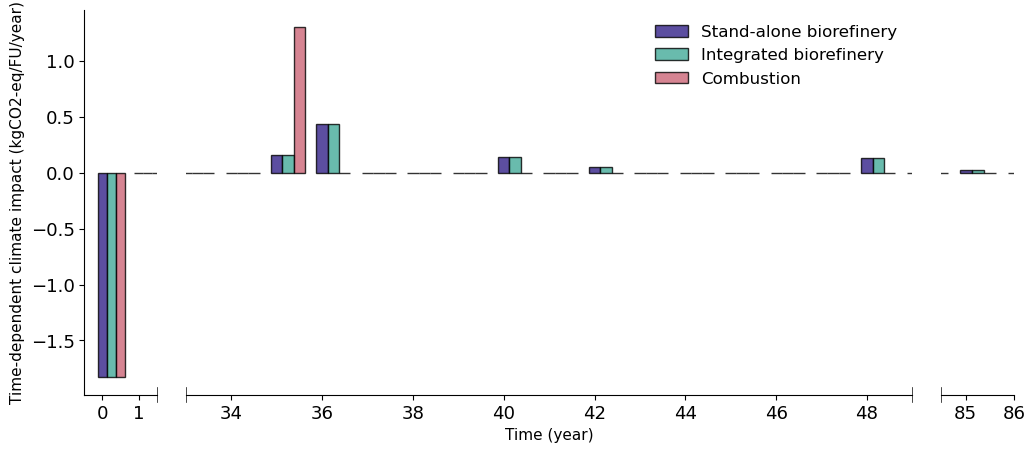

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

# Define color codes for the bars (one color for each scenario)
colors = ['#332288', '#44AA99', '#CC6677']

# Create the main figure and a GridSpec layout with three panels
fig = plt.figure(figsize=(12, 5))
spec = gridspec.GridSpec(1, 3, figure=fig, wspace=0.1, width_ratios=[0.1, 1, 0.1])

# Create subplots for the three panels
ax1 = fig.add_subplot(spec[0, 0])  # First panel
ax2 = fig.add_subplot(spec[0, 1])  # Second panel
ax3 = fig.add_subplot(spec[0, 2])  # Third panel

# Bar settings
bar_width = 0.25  # Width of each bar
x_positions = np.arange(len(df_full["Year"]))  # X-axis positions for the bars (based on the time column)

# Plot bars for each scenario in each panel
for ax in fig.axes:  # Loop over each subplot (ax1, ax2, ax3)
    for i, scenario in enumerate(df_full.columns[1:]):  # Loop over all scenarios (columns except 't')
        y_vals = df_full[scenario]  # Extract data for the current scenario
        valid_idx = ~df_full[scenario].isna()  # Create a mask for valid (non-NaN) values
        ax.bar(
            x_positions[valid_idx] + i * bar_width,  # Offset each scenario by i * bar_width
            y_vals[valid_idx],                      # Y-values for the bars
            width=bar_width,                        # Bar width
            label=scenario,                         # Scenario name for the legend
            color=colors[i],                        # Bar color
            edgecolor='black',                      # Outline color for the bars
            alpha=0.8                               # Bar transparency
        )

# Customize x-axis limits for each panel to focus on specific ranges of data
ax1.set_xlim(-0.5, 1.5)  # Focus on the first time segment
ax2.set_xlim(33, 49)     # Focus on the middle time segment
ax3.set_xlim(84.5, 86)   # Focus on the last time segment

# Add axis labels
ax2.set_xlabel("Time (year)", fontsize=11)  # X-axis label
ax1.set_ylabel("Time-dependent climate impact (kgCO2-eq/FU/year)", fontsize=11)  # Y-axis label for the first panel

# Add legend to the second panel
ax2.legend(frameon=False, bbox_to_anchor=(1, 1),loc='upper right', fontsize=12)

# Remove unnecessary spines and y-ticks for cleaner appearance
ax1.spines.right.set_visible(False)  # Hide the right spine for the first panel
ax2.spines.left.set_visible(False)   # Hide the left spine for the second panel
ax2.spines.right.set_visible(False)  # Hide the right spine for the second panel
ax3.spines.left.set_visible(False)   # Hide the left spine for the third panel

# Remove unnecessary spines for cleaner appearance
for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_visible(False)  # Hide the right spine
    ax.spines['top'].set_visible(False)    # Hide the top spine

ax2.set_yticks([])  # Remove y-ticks for the second panel
ax3.set_yticks([])  # Remove y-ticks for the third panel

# Add diagonal lines to indicate breaks in the x-axis
d = 0.02  # Size of the diagonal lines in axis coordinates

# Panel 1: Bottom-right diagonal
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1, 1), (d, -d), **kwargs, zorder=101, lw=0.5)

# Panel 2: Bottom-left and bottom-right diagonals
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((0, 0), (d, -d), **kwargs, zorder=101, lw=0.5)  # Bottom-left diagonal
ax2.plot((1, 1), (d, -d), **kwargs, zorder=101, lw=0.5)  # Bottom-right diagonal

# Set tick parameters for font size
for ax in fig.axes:
    ax.tick_params(axis='x', labelsize=13)  # Increase x-axis tick font size
    ax.tick_params(axis='y', labelsize=13)  # Increase y-axis tick font size

# Panel 3: Bottom-left diagonal
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((0, 0), (d, -d), **kwargs, zorder=101, lw=0.5)

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.savefig(str(result_dir+'/fig4_climate_impacts_DCFs_direct_emissions.pdf'), dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

### Considering direct (CO2) and indirect emissions (CO2, CH4, N2O)
The indirect emissions were calculated using the REMIND SSP2 PkBudg500 2045 background database. This calculation can be done with any backgrounds. 

In [27]:
sum_direct_DCI_copy = sum_direct_DCI.copy()
sum_indirect_DCI_R2Pk_copy = sum_indirect_DCI['R2Pk'].copy()
sum_indirect_DCI_R2Pk_copy.rename_axis('Product', inplace=True)

In [28]:
# merge the two dataframes
df_combined = pd.merge(sum_direct_DCI_copy, sum_indirect_DCI_R2Pk_copy, on=['Product', 'Year'], how='outer', suffixes=('_dir', '_ind'))

# add the values of the matching columns
df_combined['Stand-alone biorefinery'] = df_combined['Stand-alone biorefinery_dir'].fillna(0) + df_combined['Stand-alone biorefinery_ind'].fillna(0)
df_combined['Integrated biorefinery'] = df_combined['Integrated biorefinery_dir'].fillna(0) + df_combined['Integrated biorefinery_ind'].fillna(0)
df_combined['Combustion'] = df_combined['Combustion_dir'].fillna(0) + df_combined['Combustion_ind'].fillna(0)

# drop the separate columns
df_combined.drop(columns=['Stand-alone biorefinery_dir', 'Stand-alone biorefinery_ind', 
                          'Integrated biorefinery_dir', 'Integrated biorefinery_ind', 
                          'Combustion_dir', 'Combustion_ind'], inplace=True)

# add carbon capture during Year 0
new_row = pd.DataFrame({'Year': [0],'Stand-alone biorefinery': [-1.83],'Integrated biorefinery': [-1.83],'Combustion': [-1.83]}, index=['Carbon capture']) 

# Append the new row to the original DataFrame
df_combined = pd.concat([new_row, df_combined])

df_combined.sort_values(by='Year', ascending=True, inplace=True)
df_combined

/tmp/ipykernel_55204/187553495.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined['Stand-alone biorefinery'] = df_combined['Stand-alone biorefinery_dir'].fillna(0) + df_combined['Stand-alone biorefinery_ind'].fillna(0)
/tmp/ipykernel_55204/187553495.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined['Integrated biorefinery'] = df_combined['Integrated biorefinery_dir'].fillna(0) + df_combined['Integrated biorefinery_ind'].fillna(0)
/tmp/ipykernel_55204/187553495.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ff

,Year,Stand-alone biorefinery,Integrated biorefinery,Combustion
Carbon capture,0,-1.830000,-1.830000,-1.83000
starch (sub.),35,-0.240866,-0.240866,0.00000
residual biomass,35,0.162525,0.162525,0.00000
pulping,35,0.148807,0.022448,0.00000
pulp (sub.),35,0.050715,0.050715,0.00000
phenol (sub.),35,-0.297376,-0.297376,0.00000
lipophilic extraction,35,0.049179,0.006802,0.00000
heat CHP bark,35,0.000000,0.000000,1.30559
heat (burd.),35,0.001186,0.001186,0.00000
heat (RB),35,0.000260,0.000260,0.00000


In [29]:
# sum the values per year
df_summed_total = df_combined.groupby('Year').sum()

# create df with all years from 0 to 100
all_years = pd.DataFrame({'Year': range(0, 101)})

# merge with the original df to add rows for missing years with zeros
df_full_total = pd.merge(all_years, df_summed_total, on='Year', how='left')

# fill missing values with zeros
df_full_total[['Stand-alone biorefinery', 'Integrated biorefinery', 'Combustion']] = df_full_total[['Stand-alone biorefinery', 'Integrated biorefinery', 'Combustion']].fillna(0)

# sort the dataframe by year
df_full_total.sort_values(by='Year', ascending=True, inplace=True)

# export the df to Excel
df_full_total.to_excel(str(result_dir+'/total_impacts_over100years_allGHGs.xlsx')) 
df_full_total

,Year,Stand-alone biorefinery,Integrated biorefinery,Combustion
0,0,-1.83,-1.83,-1.83
1,1,0.00,0.00,0.00
2,2,0.00,0.00,0.00
3,3,0.00,0.00,0.00
4,4,0.00,0.00,0.00
...,...,...,...,...
96,96,0.00,0.00,0.00
97,97,0.00,0.00,0.00
98,98,0.00,0.00,0.00
99,99,0.00,0.00,0.00


/tmp/ipykernel_55204/4216332308.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


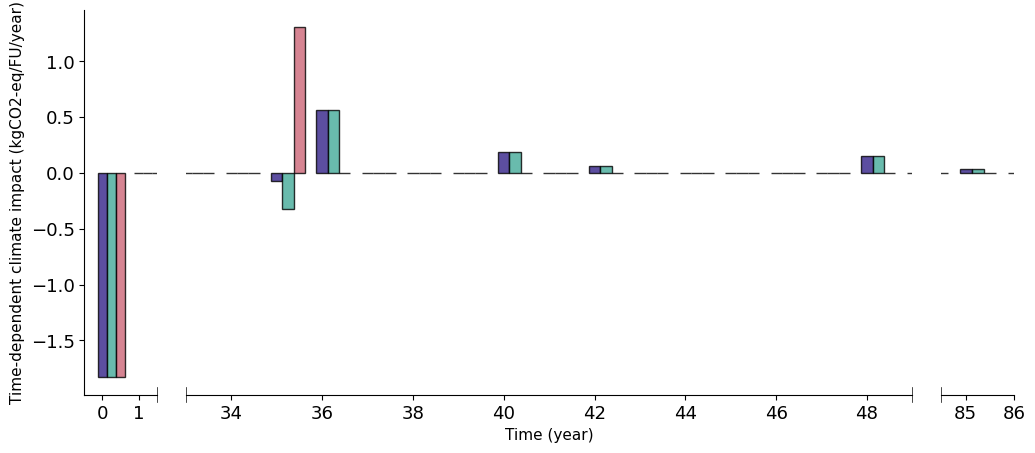

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

# Define color codes for the bars (one color for each scenario)
colors = ['#332288', '#44AA99', '#CC6677']

# Create the main figure and a GridSpec layout with three panels
fig = plt.figure(figsize=(12, 5))
spec = gridspec.GridSpec(1, 3, figure=fig, wspace=0.1, width_ratios=[0.1, 1, 0.1])

# Create subplots for the three panels
ax1 = fig.add_subplot(spec[0, 0])  # First panel
ax2 = fig.add_subplot(spec[0, 1])  # Second panel
ax3 = fig.add_subplot(spec[0, 2])  # Third panel

# Bar settings
bar_width = 0.25  # Width of each bar
x_positions = np.arange(len(df_full_total["Year"]))  # X-axis positions for the bars (based on the time column)

# Plot bars for each scenario in each panel
for ax in fig.axes:  # Loop over each subplot (ax1, ax2, ax3)
    for i, scenario in enumerate(df_full_total.columns[1:]):  # Loop over all scenarios (columns except 't')
        y_vals = df_full_total[scenario]  # Extract data for the current scenario
        valid_idx = ~df_full_total[scenario].isna()  # Create a mask for valid (non-NaN) values
        ax.bar(
            x_positions[valid_idx] + i * bar_width,  # Offset each scenario by i * bar_width
            y_vals[valid_idx],                      # Y-values for the bars
            width=bar_width,                        # Bar width
            label=scenario,                         # Scenario name for the legend
            color=colors[i],                        # Bar color
            edgecolor='black',                      # Outline color for the bars
            alpha=0.8                               # Bar transparency
        )

# Customize x-axis limits for each panel to focus on specific ranges of data
ax1.set_xlim(-0.5, 1.5)  # Focus on the first time segment
ax2.set_xlim(33, 49)     # Focus on the middle time segment
ax3.set_xlim(84.5, 86)   # Focus on the last time segment

# Add axis labels
ax2.set_xlabel("Time (year)", fontsize=11)  # X-axis label
ax1.set_ylabel("Time-dependent climate impact (kgCO2-eq/FU/year)", fontsize=11)  # Y-axis label for the first panel

# Add legend to the second panel
#ax2.legend(frameon=False, bbox_to_anchor=(1, 0.07),loc='lower right', fontsize=13)

# Remove unnecessary spines and y-ticks for cleaner appearance
ax1.spines.right.set_visible(False)  # Hide the right spine for the first panel
ax2.spines.left.set_visible(False)   # Hide the left spine for the second panel
ax2.spines.right.set_visible(False)  # Hide the right spine for the second panel
ax3.spines.left.set_visible(False)   # Hide the left spine for the third panel

# Remove unnecessary spines for cleaner appearance
for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_visible(False)  # Hide the right spine
    ax.spines['top'].set_visible(False)    # Hide the top spine

ax2.set_yticks([])  # Remove y-ticks for the second panel
ax3.set_yticks([])  # Remove y-ticks for the third panel

# Add diagonal lines to indicate breaks in the x-axis
d = 0.02  # Size of the diagonal lines in axis coordinates

# Panel 1: Bottom-right diagonal
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1, 1), (d, -d), **kwargs, zorder=101, lw=0.5)

# Panel 2: Bottom-left and bottom-right diagonals
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((0, 0), (d, -d), **kwargs, zorder=101, lw=0.5)  # Bottom-left diagonal
ax2.plot((1, 1), (d, -d), **kwargs, zorder=101, lw=0.5)  # Bottom-right diagonal

# Set tick parameters for font size
for ax in fig.axes:
    ax.tick_params(axis='x', labelsize=13)  # Increase x-axis tick font size
    ax.tick_params(axis='y', labelsize=13)  # Increase y-axis tick font size

# Panel 3: Bottom-left diagonal
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((0, 0), (d, -d), **kwargs, zorder=101, lw=0.5)

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.savefig(str(result_dir+'/fig4_climate_impacts_DCFs_total_emissions.pdf'), dpi=300, bbox_inches='tight')
# Display the plot
plt.show()


# Total time-dependent climate impacts

The code below was used to generate Figure 5 from the main article. 

In [32]:
# store all BGs in a dict
bg_df_dict_temp = {'ei39':sum_indirect_DCI['ei39'], 'R2Pk': sum_indirect_DCI['R2Pk'], 'R2B': sum_indirect_DCI['R2B'], 'R1Pk': sum_indirect_DCI['R1Pk'], 'I2B': sum_indirect_DCI['I2B']}

# drop the 'Year' column for all the dfs
bg_df_dict = {}
for db_name in bg_df_dict_temp.keys():
    df = bg_df_dict_temp[db_name].copy()
    df = df.drop(['Year'], axis=1) # drop the 'Year' column
    bg_df_dict[db_name] = df
bg_df_dict.keys()

# add a 'Total' row to the direct impacts df
sum_direct_DCI.loc['Total']= sum_direct_DCI.sum()

In [37]:
sum_direct_DCI

,Stand-alone biorefinery,Integrated biorefinery,Combustion,Year
Product,,,,
residual biomass,0.162525,0.162525,NaN,35
EoL pulp biomed,0.15091,0.15091,NaN,36
EoL pulp textiles,0.143476,0.143476,NaN,40
EoL pulp nanocomposites,0.114162,0.114162,NaN,55
EoL phenol automotive,0.131802,0.131802,NaN,48
EoL phenol construction,0.026645,0.026645,NaN,85
EoL phenol furniture,0.057499,0.057499,NaN,50
EoL phenol electronics,0.050298,0.050298,NaN,42
EoL phenol others,0.014407,0.014407,NaN,56


In [33]:
# choose the bg to plot
#ei = 'ei39'
ei = 'R2Pk'
total_df = bg_df_dict[ei] 

In [34]:
# aggregate the EoL values into a unique row
total_df.loc['EoL']= total_df.iloc[10:20].sum()
total_df_vf = total_df.drop(total_df.index[10:20])

# move the EoL row up
#total_df_vf = total_df_vf.drop(['Total'])
row_to_move = total_df_vf.iloc[[10]]
total_df_vf = total_df_vf.drop(['EoL'])
total_df_vf = pd.concat([total_df_vf.iloc[:5], row_to_move, total_df_vf.iloc[5:]])

## add a row from the direct CO2 emissions (biogenic)
total_df_vf.loc['direct CO2'] = sum_direct_DCI.loc['Total']

#change index labels
index_labels = ['lipophilic extraction', 'sugar extraction', 'pulping', 'heat (RB)', 'heat (burd.)','EoL', 
                'tall oil (sub.)', 'starch (sub.)', 'phenol (sub.)', 'pulp (sub.)', 'heat CHP bark', 'biogenic CO2']
total_df_vf.index = index_labels
total_df_vf.rename(columns={'Stand-alone biorefinery': 'Stand-alone\nbiorefinery', 'Integrated biorefinery': 'Integrated\nbiorefinery'}, inplace=True)
#total_df_vf.loc['Total']= total_df_vf.sum()
total_df_vf.to_excel(str(result_dir+'/total_climate_impacts_DCFs_' + ei +'.xlsx')) 
total_df_vf

,Stand-alone\nbiorefinery,Integrated\nbiorefinery,Combustion
lipophilic extraction,0.049179,0.006802,0.0
sugar extraction,0.086848,0.000009,0.0
pulping,0.148807,0.022448,0.0
heat (RB),0.00026,0.00026,0.0
heat (burd.),0.001186,0.001186,0.0
EoL,0.269112,0.269112,0.0
tall oil (sub.),-0.029054,-0.029054,0.0
starch (sub.),-0.240866,-0.240866,0.0
phenol (sub.),-0.297376,-0.297376,0.0
pulp (sub.),0.050715,0.050715,0.0


In [35]:
# color palette from: https://davidmathlogic.com/colorblind/#%23332288-%23117733-%2344AA99-%2388CCEE-%23DDCC77-%23CC6677-%23AA4499-%23882255
colors = ['#DDCC77', # LE yellow
          '#88CCEE', # SE sky blue
          '#332288', # P dark blue
          '#fff0db', # heat (RB) beige
          'black', # heat burd. black
          '#882255',# EoL red wine
          '#D3D3D3', #tall oil sub.light grey
          '#44AA99', # starch sub. teal
          '#117733', # phenol sub. dark green 
          '#AA4499', # pulp sub.plum pink
          'grey', # heat CHP bark dark grey
          '#CC6677', # biogenic CO2 orange pink          
]

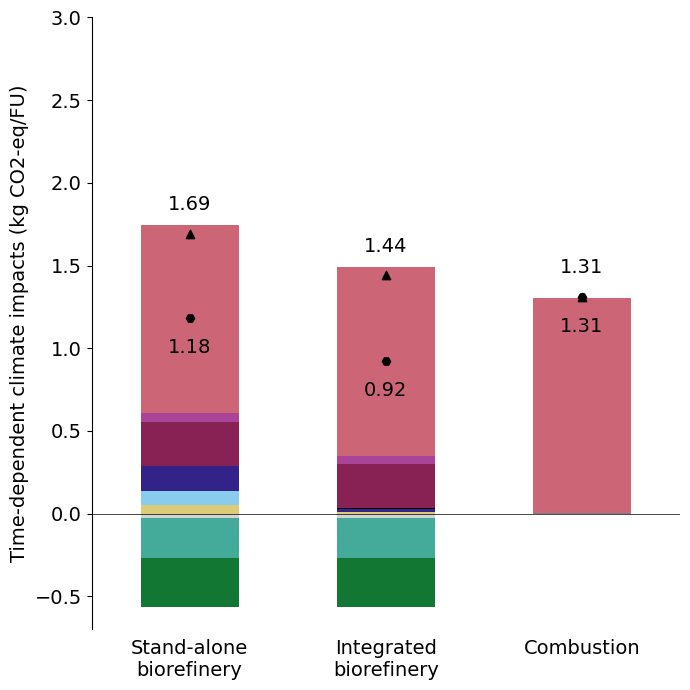

In [36]:
# GWP scores with substitution
GWP_scores_ei39 = list(total_df_vf.sum())
GWP_scores_ei39 = ['%.2f' % elem for elem in GWP_scores_ei39]
GWP_scores_ei39 = [float(elem) for elem in GWP_scores_ei39] # the list items must be floats
GWP_scores_ei39

# GWP scores without substitution
df_wo_subst_ei39 = total_df_vf.drop(['heat (burd.)', 'tall oil (sub.)', 'starch (sub.)', 'phenol (sub.)', 'pulp (sub.)'])
GWP_scores_wo_subst_ei39 = list(df_wo_subst_ei39.sum())
GWP_scores_wo_subst_ei39 = ['%.2f' % elem for elem in GWP_scores_wo_subst_ei39]
GWP_scores_wo_subst_ei39 = [float(elem) for elem in GWP_scores_wo_subst_ei39] # the list items must be floats
GWP_scores_wo_subst_ei39

# transpose the dataframe
df_transposed = total_df_vf.T

fig, ax = plt.subplots(figsize=(7, 7))

ax.set_ylim(-0.7,3.0)

col_names = ['Stand-alone\nbiorefinery', 'Integrated\nbiorefinery', 'Combustion']

bars = df_transposed.plot(kind='bar', stacked=True, ax=ax, color=colors,legend = False, width=0.5)
ax.set_ylabel('Time-dependent climate impacts (kg CO2-eq/FU)', fontsize=14)
#ax.legend(loc='lower center', bbox_to_anchor=(0.55, 0.7), title_fontsize='12', fontsize='14', ncol=2, frameon = False)

ax.tick_params(axis='x', labelsize=14, rotation=0)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# add the single GWP100 scores for each scenario
categories_index = np.arange(len(col_names))
ax.scatter(categories_index, GWP_scores_wo_subst_ei39, color='black', marker = '^', zorder=5)
ax.scatter(categories_index, GWP_scores_ei39, color='black', marker = 'H', zorder=5)

for i, val in enumerate(GWP_scores_ei39):
    ax.text(categories_index[i], val - 0.12, f'{val}', ha='center', color='black',va = 'top', fontsize=14)

for i, val in enumerate(GWP_scores_wo_subst_ei39):
    ax.text(categories_index[i], val+0.12, f'{val}', ha='center', color='black',va = 'bottom', fontsize=14)

# +/- 0.08

plt.tight_layout()

#plt.savefig(str(result_dir+'/fig5_DCFs_results_' + ei + '.pdf'), dpi=300)
plt.savefig(str(result_dir+'/fig5_DCFs_results_'+ei+'.pdf'), dpi=300)

plt.show()

# Sensitivity analysis: Influence of the product's lifespan

The product's lifespan influences the calculation of the time-dependent climate impacts through the choice of dynamic characterisation factors. Here, the change in losses of biomass are fixed to 0 as well as the change in biogenic carbon content of bark (i.e. one-at-a-time sensitivity analysis). Both the direct and indirect emissions are affected by a change in the dynamic CFs. The maximum lifespan is fixed at 100 years. The background database used is ecoinvent consequential 3.9

In [ ]:
percentage_change_list = np.arange(-0.3, 0.3,0.01).tolist()
#percentage_change_list = [0] # to check that the values obtained are the same than in the Excel file
inventory_dict.keys()

In [ ]:
def calculate_time_dependent_impacts_GHG(emissions_df, GHG, percentage_change_list, f):

    GHG_impact_standalone = []
    GHG_impact_integrated = []
    GHG_impact_combustion = []

    for value in percentage_change_list:
        
        df = emissions_df.copy()

        # Adjust the "Year" values based on the percentage change
        df['Year'] = df['Year'] + df['Year'] * value
        df['Year'] = df['Year'].apply(lambda x: min(x, 100))  # Cap at 100 years

        # Calculate the climate factor and impacts
        cf_column = f'CF_{GHG}'
        df[cf_column] = df.apply(lambda row: f(row['Year']), axis=1)
        df['Stand-alone biorefinery'] *= df[cf_column]
        df['Integrated biorefinery'] *= df[cf_column]
        df['Combustion'] *= df[cf_column]

        # Calculate total impacts
        GHG_impact_standalone.append(df['Stand-alone biorefinery'].sum())
        GHG_impact_integrated.append(df['Integrated biorefinery'].sum())
        GHG_impact_combustion.append(df['Combustion'].sum())

    return GHG_impact_standalone, GHG_impact_integrated, GHG_impact_combustion

In [ ]:
def calculate_total_impacts():

    total_impact_standalone = []
    total_impact_integrated = []
    total_impact_combustion = []

    iSCO2, iICO2, iCCO2 = calculate_time_dependent_impacts_GHG(inventory_dict['ei39CO2'], 'CO2', percentage_change_list, fCO2)
    SCH4, ICH4, CCH4 = calculate_time_dependent_impacts_GHG(inventory_dict['ei39CH4'], 'CH4', percentage_change_list, fCH4)
    SN2O, IN2O, CN2O = calculate_time_dependent_impacts_GHG(inventory_dict['ei39N2O'], 'N2O', percentage_change_list, fN2O)
    dSCO2, dICO2, dCCO2 = calculate_time_dependent_impacts_GHG(direct_CO2_emissions_df, 'CO2', percentage_change_list, fCO2)
    
    # Sum indirect and direct impacts
    total_standalone = [a + b + c + d for a,b,c,d in zip(iSCO2,SCH4,SN2O,dSCO2)]
    total_integrated = [a + b + c + d for a,b,c,d in zip(iICO2,ICH4,IN2O,dICO2)]
    total_combustion = [a + b + c + d for a,b,c,d in zip(iCCO2,CCH4,CN2O, dCCO2)]

    return total_standalone, total_integrated, total_combustion

In [ ]:
total_standalone, total_integrated, total_combustion = calculate_total_impacts()

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
fig, ax = plt.subplots(figsize=(7, 5))

# Plot continuous lines
plt.plot(percentage_change_list, total_standalone, 
         label='Stand-alone biorefinery', color='#332288', linestyle='-', linewidth=3.5)
plt.plot(percentage_change_list, total_integrated, 
         label='Integrated biorefinery', color='#44AA99', linestyle='-', linewidth=3.5)
plt.plot(percentage_change_list, total_combustion, 
         label='Combustion', color='#CC6677', linestyle='-', linewidth=3.5)

# Adding titles and labels
plt.xlabel('Change of lifespan (%)', size=13)
plt.ylabel('Time-dependent climate impacts (kg CO2-eq/FU)', size=13)
plt.legend(frameon=False, fontsize=13, loc='lower center', bbox_to_anchor=(0.27, 0.5))

# Customize axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', labelsize=13, rotation=0)
ax.tick_params(axis='y', labelsize=13)

# Save and show plot
plt.tight_layout()
plt.savefig(str(result_dir+'/fig6_sensitivity_lifespan_DCFs.pdf'), dpi=300)

plt.show()

# Sensitivity analysis: Influence of background data

The choice of the background database influences the calculation of the indirect emissions. The results obtained are stored in Excel files that are imported below to plot the sensisitvity analysis graph. 

In [ ]:
bg_df_dict['ei39']

In [ ]:
bg_df_dict_agg = {}
df_total_impacts = pd.DataFrame(columns=['Stand-alone\nbiorefinery','Integrated\nbiorefinery','Combustion'])

for key in bg_df_dict.keys():

    df = bg_df_dict[key].copy()

    # aggregate the EoL values into a unique row
    df.loc['EoL']= df.iloc[10:20].sum()
    df = df.drop(df.index[10:20])

    # move the EoL row up
    row_to_move = df.iloc[[10]]
    df = df.drop(['EoL'])
    df = pd.concat([df.iloc[:5], row_to_move, df.iloc[5:]])
    
    ## add a row from the direct CO2 emissions (biogenic)
    df.loc['direct CO2'] = sum_direct_DCI.loc['Total']

    df.loc['Total'] = df.sum()
    
    #change index labels
    index_labels = ['lipophilic extraction', 'sugar extraction', 'pulping', 'heat (RB)', 'heat (burd.)','EoL', 
                    'tall oil (sub.)', 'starch (sub.)', 'phenol (sub.)', 'pulp (sub.)', 'heat CHP bark', 'biogenic CO2', 'Total']
    
    df.index = index_labels
    df.rename(columns={'Stand-alone biorefinery': 'Stand-alone\nbiorefinery', 'Integrated biorefinery': 'Integrated\nbiorefinery'}, inplace=True)
    #total_df_vf.loc['Total']= total_df_vf.sum()

    # export the results to Excel file
    df.to_excel(str(result_dir+'/total_climate_impacts_DCFs_' + key +'.xlsx')) 

    # add df to updated dict
    bg_df_dict_agg[key]=df 

    # add total values to df
    df_total_impacts.loc[key] = df.loc['Total'] 

bg_df_dict_agg.keys()

In [ ]:
df_total_impacts

In [ ]:
# Marker styles and colors for different models
markers = ['o', 's', '^', 'D', 'p']
colors = ['#332288', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677']
scenarios= ['Stand-alone\nbiorefinery','Integrated\nbiorefinery','Combustion']
db_names = {'ei39':'Conventional', 'R2Pk':'REMIND-SSP2-PkBudg500-2045', 'R2B':'REMIND-SSP2-Base-2045','R1Pk':'REMIND-SSP1-PkBudg500-2045','I2B':'IMAGE-SSP2-Base-2045'}

# Create figure and axis
fig, ax = plt.subplots(figsize=(7,5))

# Set the positions of the x-ticks with reduced spacing
x_positions = (np.arange(len(scenarios))*4)  # Reduced spacing

# Plotting data points for each model in all scenarios
for j, db in enumerate(db_names.keys()):
    x_coords = []
    y_coords = []
    for i, scenario in enumerate(scenarios):
        x_coords.append(x_positions[i])  # Adjusted x-axis position
        y_coords.append(df_total_impacts[scenario][db])  # Corresponding y-value for the model

    # Plot each model with a unique marker and color
    plt.scatter(x_coords, y_coords, marker=markers[j], facecolor = 'None',edgecolor=colors[j], s=100, label=db_names[db], linewidths=3)
    #plt.scatter(x_coords, y_coords, marker=markers[j], color=colors[j], s=100, label=model)

# Set labels and title#
plt.xticks(ticks=x_positions, labels=scenarios, size=14)
ax.set_xlim(-1.5,10)
#plt.xlabel("Scenarios")
plt.ylabel("Time-differentiated climate impact (kg CO2-eq/FU)", size = 12.5)
#plt.title("Scatter Plot of Different Scenarios and Models")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', labelsize=13, rotation=0)
ax.tick_params(axis='y', labelsize=13)

# Add legend for models, with a smaller font size and adjusted position
plt.legend(frameon=False,bbox_to_anchor=(0.98, 0.98), loc='upper right', fontsize=13)

# Show grid
#plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout()
plt.savefig(str(result_dir+'/fig6_sensitivity_background_DCFs.pdf'), dpi=300)

# Show the plot
plt.show()